In [2]:
#making hu images from 3d volume
from mainfunctions2 import *
from preprocessing import *
from postprocessing import *

118 8 273 398


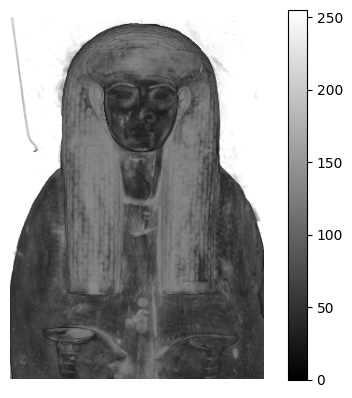

In [2]:
HU_img = imageio.imread("photosforanalysis\\mummyhuvaluessimplecmap3.png")
#crop hu image manually
cropped_HU_img = cv.selectROI(HU_img)
x, y, w, h = cropped_HU_img
print(x, y, w, h)
cropped_HU_img = HU_img[y:y+h, x:x+w]
plt.figure()

plt.imshow(cropped_HU_img, cmap='gray')
plt.colorbar()
#turn off axis
plt.axis('off')
plt.show()


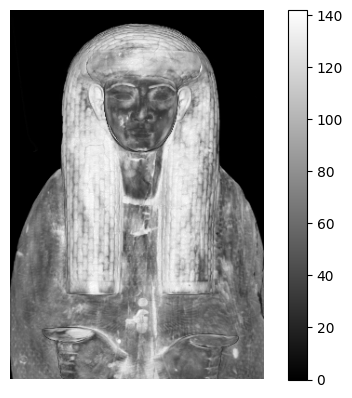

In [15]:
#display with grayscale up to 255
plt.figure()
plt.imshow(cropped_HU_img, cmap='gray')
plt.colorbar()
plt.axis('off')
plt.show()



In [13]:
#save 
imageio.imwrite("photosforanalysis\\cropped_HU_img_graymap.png", cropped_HU_img)


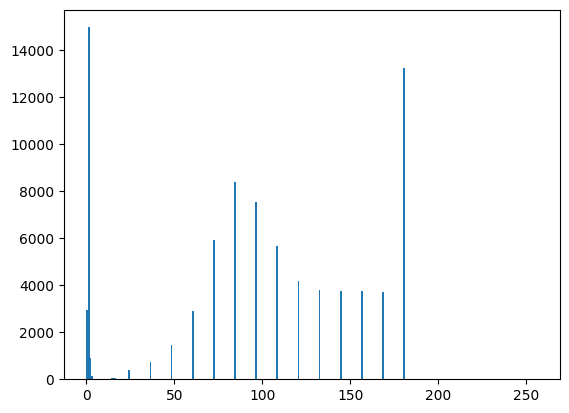

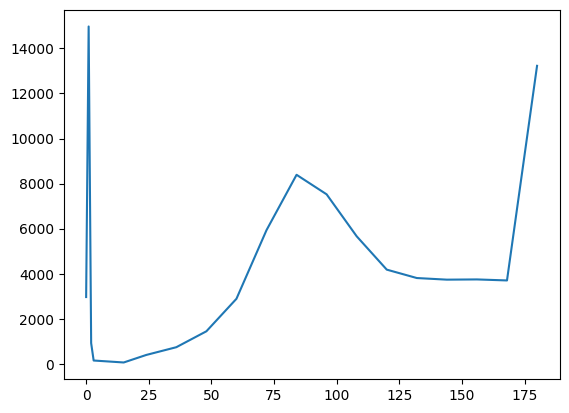

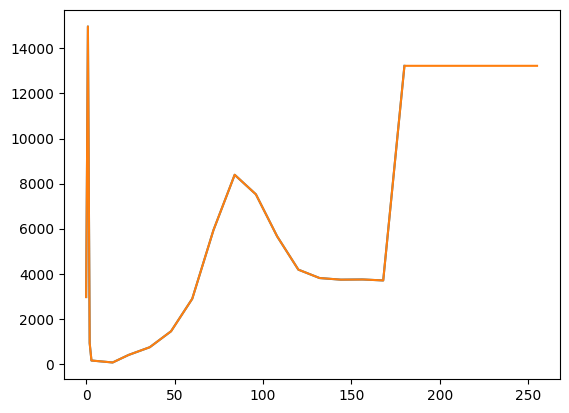

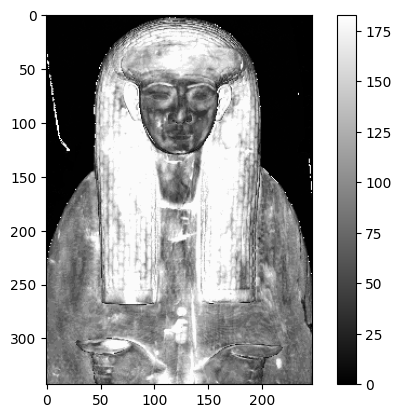

In [26]:
#show HU image as a histogram  
plt.figure()
hist = plt.hist(cropped_HU_img.ravel(),256,[0,256])
#join peaks of histogram 
#remove areas of hist that are zero 
hist_zeros_removed_values= []
hist_zeros_removed_numbers = []
for i in range(256):
    if hist[0][i] >50:
        hist_zeros_removed_values.append(hist[0][i])
        hist_zeros_removed_numbers.append(hist[1][i])
plt.figure()


plt.plot(hist_zeros_removed_numbers,hist_zeros_removed_values)
#inrerpolate the histogram
plt.figure()
plt.plot(hist_zeros_removed_numbers,hist_zeros_removed_values)
#show as a grayscale image
plt.figure()
plt.imshow(cropped_HU_img,cmap='gray')
plt.colorbar()



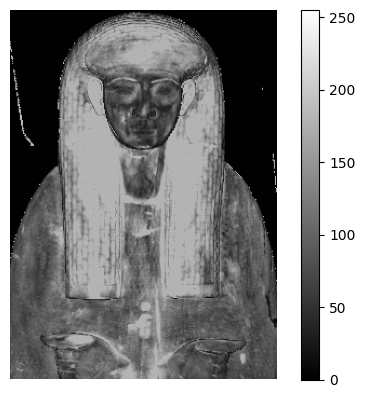

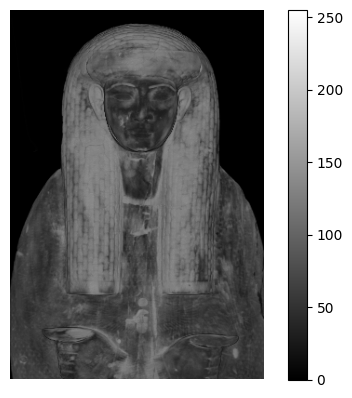

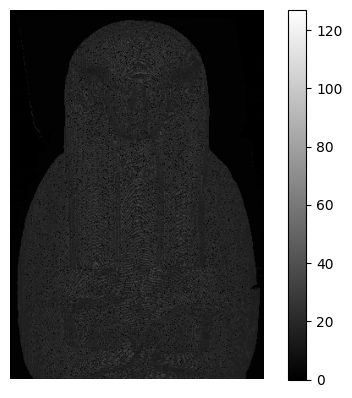

In [15]:
#load
sweep_img = imageio.imread("photosforanalysis\\mummyhuvaluesbwt09_cropped.png")
opaquesweep_img=imageio.imread("photosforanalysis\\HU_img_sweep_opaque_cropped.png")

#show
plt.figure()
plt.imshow(sweep_img,cmap='grey', vmin=0, vmax=255)
plt.colorbar()
plt.axis('off')
plt.show()

plt.figure()
plt.imshow(cropped_HU_img,cmap='grey' , vmin=0, vmax=255)
plt.colorbar()
plt.axis('off')
plt.show()

plt.figure()
plt.imshow(opaquesweep_img,cmap='gray', vmin=0, vmax=127)
plt.colorbar()
plt.axis('off')
plt.show()



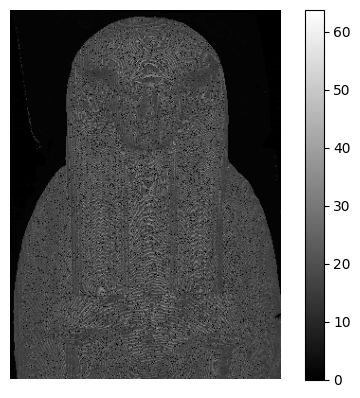

In [21]:
#crop opaquesweep_img
'''cropped_opaquesweep_img = cv.selectROI(opaquesweep_img)
x, y, w, h = cropped_opaquesweep_img
print(x, y, w, h)
cropped_opaquesweep_img = opaquesweep_img[y:y+h, x:x+w]
plt.figure()'''

plt.imshow(cropped_opaquesweep_img, cmap='gray', vmin=0, vmax=255/4)
plt.colorbar()
#turn off axis
plt.axis('off')
plt.show()

#save as photosforanalysis\\cropped_HU_img_sweep_opaque.png
imageio.imwrite("photosforanalysis\\cropped_HU_img_sweep_opaque.png", cropped_opaquesweep_img)


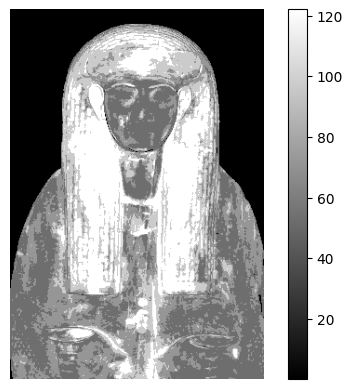

[[  0.24479186]
 [ 71.81062878]
 [122.04658037]
 [ 52.85442315]
 [ 97.25450383]]


In [6]:
# apply clustering to cropped_HU_img to select diffrent materials
from sklearn.cluster import KMeans

#read image "photosforanalysis\\cropped_HU_img_graymap.png"
cropped_HU_img = imageio.imread("photosforanalysis\\cropped_HU_img_graymap.png")
#apply kmeans clustering to cropped_HU_img
kmeans = KMeans(n_clusters=5)
kmeans.fit(cropped_HU_img.reshape(-1,1))
clustered_img = kmeans.cluster_centers_[kmeans.labels_]
clustered_img = np.reshape(clustered_img, cropped_HU_img.shape)
plt.figure()
plt.imshow(clustered_img, cmap='gray')
plt.colorbar()
plt.axis('off')
plt.show()

print (kmeans.cluster_centers_)

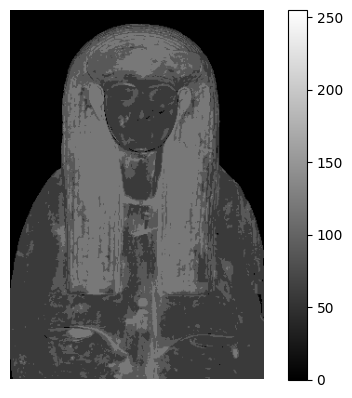

[[ 88.46081417]
 [  0.33242667]
 [ 58.24033986]
 [119.75726939]]
{0: 21347, 1: 27206, 2: 36956, 3: 23145}


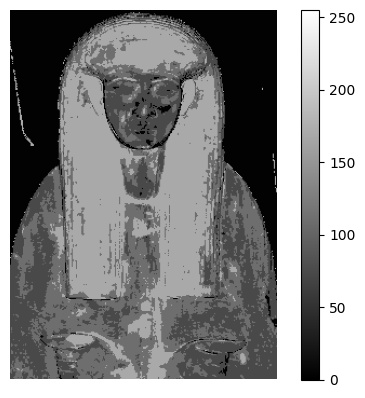

[[ 73.64172723]
 [  2.83571113]
 [169.00409182]
 [110.4218108 ]]
{0: 18712, 1: 20397, 2: 24439, 3: 21173}


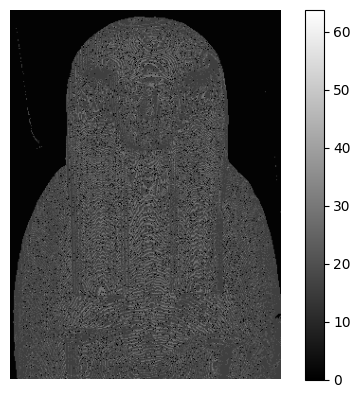

[[15.72537712]
 [ 0.86106277]
 [28.44687942]
 [20.78445147]]
{0: 39709, 1: 32180, 2: 9902, 3: 30035}


In [20]:
#load
nofclusters=4
#read image "photosforanalysis\\cropped_HU_img_graymap.png"
cropped_HU_img = imageio.imread("photosforanalysis\\cropped_HU_img_graymap.png")
#apply kmeans clustering to cropped_HU_img
kmeans = KMeans(n_clusters=nofclusters)
kmeans.fit(cropped_HU_img.reshape(-1,1))
clustered_img = kmeans.cluster_centers_[kmeans.labels_]
clustered_img = np.reshape(clustered_img, cropped_HU_img.shape)
plt.figure()
plt.imshow(clustered_img, cmap='gray', vmin=0, vmax=255)
plt.colorbar()
plt.axis('off')
plt.show()

print (kmeans.cluster_centers_)
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))

sweep_img = imageio.imread("photosforanalysis\\mummyhuvaluesbwt09_cropped.png")
opaquesweep_img=imageio.imread("photosforanalysis\\cropped_HU_img_sweep_opaque.png")
#apply kmeans clustering to 
kmeans = KMeans(n_clusters=nofclusters)
kmeans.fit(sweep_img.reshape(-1,1))
clustered_img = kmeans.cluster_centers_[kmeans.labels_]
clustered_img = np.reshape(clustered_img, sweep_img.shape)
plt.figure()
plt.imshow(clustered_img, cmap='gray', vmin=0, vmax=255)
plt.colorbar()
plt.axis('off')
plt.show()

print (kmeans.cluster_centers_)
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))

#apply kmeans clustering to opaquesweep_img
kmeans = KMeans(n_clusters=nofclusters)
kmeans.fit(opaquesweep_img.reshape(-1,1))
clustered_img = kmeans.cluster_centers_[kmeans.labels_]
clustered_img = np.reshape(clustered_img, opaquesweep_img.shape)
plt.figure()
plt.imshow(clustered_img, cmap='gray', vmin=0, vmax=255/4)
plt.colorbar()
plt.axis('off')
plt.show()

print (kmeans.cluster_centers_)

#number of pixels in each cluster
unique, counts = np.unique(kmeans.labels_, return_counts=True)
print(dict(zip(unique, counts)))


In [3]:
def showkmeanscolours(colours):
    for i in range(0,len(colours)):
        #divide by 5 and round up
        plt.subplot(len(colours)//5 +1, 5, i+1)
        color_image = print_color_from_rgb(colours[i][0],colours[i][1],colours[i][2])
        plt.imshow(color_image)
        plt.axis('off')
        
        plt.subplots_adjust(right=0.8)

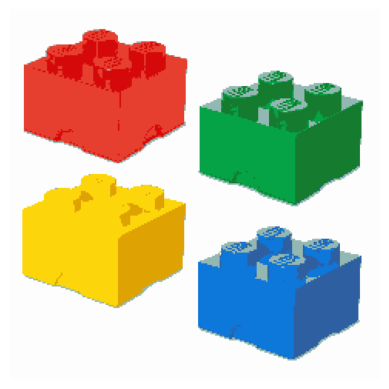

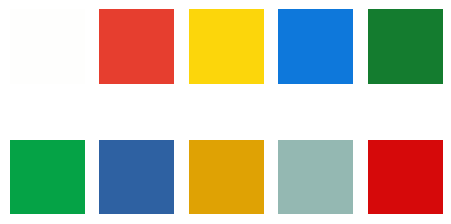

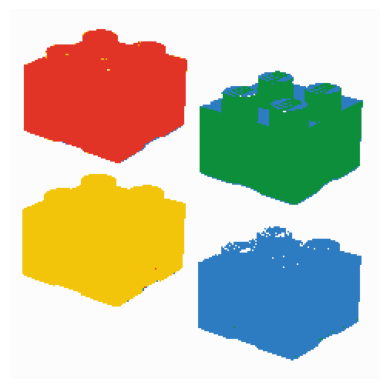

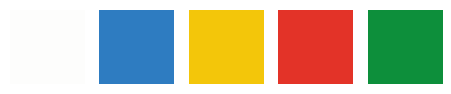

(-0.5, 239.5, 239.5, -0.5)

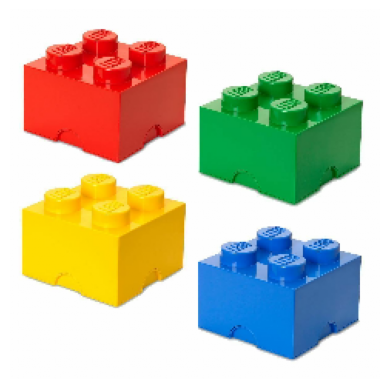

In [17]:
# liad image 
#rgb_img = imageio.imread("C:\\Users\\Ana Stojanovic\\OneDrive\\Desktop\\IIB project\\Data\\mummy\\Mummy Board\\photos\\E.1.1822.c.02.jpg")
#rgb_img = imageio.imread("C:\\Users\\Ana Stojanovic\\Downloads\\pexels-karolina-grabowska-4887167.jpg")
#rgb_img = imageio.imread("photos\\materials_sample.jpg")
#lego 
rgb_img=  imageio.imread("photos\\lego_sample.png")

'''
#apply kmeans clustering to rgb_img
kmeans = KMeans(n_clusters=20)
kmeans.fit(rgb_img.reshape(-1,3))
clustered_img = kmeans.cluster_centers_[kmeans.labels_]
clustered_img = np.reshape(clustered_img, rgb_img.shape)
plt.figure()
plt.imshow(clustered_img / 255)
plt.axis('off')
plt.show()

#sort colours by frequency
unique, counts = np.unique(kmeans.labels_, return_counts=True)
sorted_colours = [x for _, x in sorted(zip(counts, kmeans.cluster_centers_))]
#invert order
sorted_colours = sorted_colours[::-1]
showkmeanscolours(sorted_colours)
plt.show()'''


#sort colours by frequency


#apply kmeans clustering to rgb_img
kmeans = KMeans(n_clusters=10)
kmeans.fit(rgb_img.reshape(-1,3))
clustered_img = kmeans.cluster_centers_[kmeans.labels_]
clustered_img = np.reshape(clustered_img, rgb_img.shape)
plt.figure()
plt.imshow(clustered_img / 255)
plt.axis('off')
plt.show()

unique, counts = np.unique(kmeans.labels_, return_counts=True)
sorted_colours = [x for _, x in sorted(zip(counts, kmeans.cluster_centers_))]
sorted_colours = sorted_colours[::-1]

showkmeanscolours(sorted_colours)
plt.show()

#apply kmeans clustering to rgb_img
kmeans = KMeans(n_clusters=5)
kmeans.fit(rgb_img.reshape(-1,3))
clustered_img = kmeans.cluster_centers_[kmeans.labels_]
clustered_img = np.reshape(clustered_img, rgb_img.shape)
plt.figure()
plt.imshow(clustered_img / 255)
plt.axis('off')
plt.show()

unique, counts = np.unique(kmeans.labels_, return_counts=True)
sorted_colours = [x for _, x in sorted(zip(counts, kmeans.cluster_centers_))]
sorted_colours = sorted_colours[::-1]

showkmeanscolours(sorted_colours)
plt.show()

plt.figure()
plt.imshow(rgb_img / 255)
plt.axis('off')





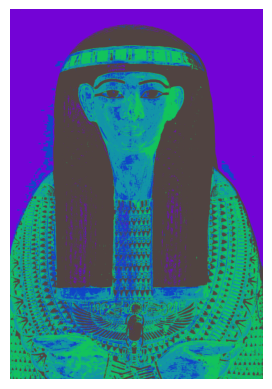

In [32]:
#change image to hsv
hsv_img = cv.cvtColor(rgb_img, cv.COLOR_RGB2HSV)

#apply kmeans clustering to hsv_img
kmeans = KMeans(n_clusters=5)
kmeans.fit(hsv_img.reshape(-1,3))
clustered_img = kmeans.cluster_centers_[kmeans.labels_]
clustered_img = np.reshape(clustered_img, hsv_img.shape)
plt.figure()
plt.imshow(clustered_img / 255 )
plt.axis('off')
plt.show()



In [1]:
blocks_img = imageio.imread("C:\\Users\\Ana Stojanovic\\Downloads\\pexels-karolina-grabowska-4887167.jpg")

def show_clusterimages(colours):
    if top==0:
        top=len(colours)
    plt.figure()
    for i in range(0,top):
        #divide by 5 and round up
        plt.subplot(len(colours)//5 +1, 5, i+1)
        r,g,b= colours[i]   
        color_image = print_color_from_rgb(r,g,b)
        plt.imshow(color_image)
        #dont show axis
        plt.xticks([])
        plt.yticks([])
        #make titles small
        plt.rcParams.update({'font.size': 6})
        plt.subplots_adjust(right=0.8)

plt.figure()
plt.imshow(blocks_img)

#downsample the image
blocks_imgds = blocks_img[0::2,0::2,:]
colourlist = []
#apply kmeans clustering to blocks_imgds
kmeans = KMeans(n_clusters=5)
kmeans.fit(blocks_imgds.reshape(-1,3))
clustered_img = kmeans.cluster_centers_[kmeans.labels_]
clustered_img = np.reshape(clustered_img, blocks_imgds.shape)
plt.figure()
plt.imshow(clustered_img / 255)
plt.axis('off')
plt.show()
#make list of colour and number of pixels in each cluster
unique, counts = np.unique(kmeans.labels_, return_counts=True)  
colours = kmeans.cluster_centers_
#sort by number of pixels in each cluster
colours


show_clusterimages(colourlist)

kmeans = KMeans(n_clusters=8)
kmeans.fit(blocks_imgds.reshape(-1,3))
clustered_img = kmeans.cluster_centers_[kmeans.labels_]
clustered_img = np.reshape(clustered_img, blocks_imgds.shape)
plt.figure()
plt.imshow(clustered_img / 255)
plt.axis('off')
plt.show()
#make list of colour and number of pixels in each cluster
unique, counts = np.unique(kmeans.labels_, return_counts=True)  
colours = kmeans.cluster_centers_
colourlist[0] = colours
colourlist[1] = counts
show_clusterimages(colourlist)


kmeans = KMeans(n_clusters=10)
kmeans.fit(blocks_imgds.reshape(-1,3))
clustered_img = kmeans.cluster_centers_[kmeans.labels_]
clustered_img = np.reshape(clustered_img, blocks_imgds.shape)
plt.figure()
plt.imshow(clustered_img / 255)
plt.axis('off')
plt.show()
#make list of colour and number of pixels in each cluster
unique, counts = np.unique(kmeans.labels_, return_counts=True)  
colours = kmeans.cluster_centers_
colourlist[0] = colours
colourlist[1] = counts
show_clusterimages(colourlist)


NameError: name 'imageio' is not defined